# Introductory applied machine learning (INFR10069)
# Assignment 4: Unsupervised Learning Part A (KMeans Clustering)

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 4 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 4 and deals with the News-Group Dataset - Part B deals with the MNIST dataset. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:
1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.
   
1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 04_A_KMeans.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_A_KMeans.ipynb
    scp -r [FULL PATH TO 04_B_PCA.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_B_PCA.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Both Part A (this notebook) and Part B are each worth 50% of the Total Mark for Assignment 4.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# For Getting the Data
from sklearn.datasets import fetch_20newsgroups, load_digits
from sklearn.feature_extraction.text import TfidfVectorizer

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import collections
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from utils.plotter import plot_voronoi


Populating the interactive namespace from numpy and matplotlib


/home/Evan/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset

In this part of the assignment we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

### Description of the Data

This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)) for each word instead of the frequency counts (which is why we will be downloading it anew). These weights represent the importance of a word to a document with respect to a collection of documents. The importance increases proportionally to the number of times a word appears in the document and decreases proportionally to the number of times the word appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that appear in more than two documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words). We have provided the code for this preprocessing for you.

## 1. Exploration of the dataset

Instead of providing the data as a dataset, we are going to import the data from the sklearn library. Make sure you have an active internet connection and run the cell below to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.19/datasets/index.html#the-20-newsgroups-text-dataset)).

**Do not change any of the code in this cell.**

*This may take a wee while as it needs to download the dataset and preprocess it.*

In [2]:
# Load the Data with only the required categories
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'), data_home='./datasets')
# Transform Data to TF-IDF and store in X/y
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X = pd.DataFrame(vectorizer.fit_transform(newsgroups_train.data).todense(), 
                 columns=vectorizer.get_feature_names())
y = pd.Series(np.array(cats)[newsgroups_train.target])

### ========== Question 1.1 --- [10 marks] ==========

As usual we start with an initial inspection of the data. 

&nbsp;&nbsp;**(a)** [Code] Using suitable pandas/numpy methods, summarise the key properties of the data (variables `X` and `y`). This should be no more than a few lines of code.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on your observations from ***(a)*** (dimensionality, data ranges, anything out of the ordinary). Be sure to indicate what `X` and `y` are (data type and purpose). (<5 sentences)<br>
&nbsp;&nbsp;**(c)** [Text] Why do you think it is useful to consider TF-IDF weights as opposed to just the frequency of times a word appears in a document as a feature? (1 or 2 sentences)

In [3]:
# (a) # Your Code goes here:
print("X shape ", X.shape)
print("y shape ", y.shape)
print(y.head(5))
print(y.describe())
print(X.head(3))
print(X.info())
print("X mean:\n", X.mean())
print("X max: ", X.max()[0:5])
X.describe()

X shape  (2845, 1000)
y shape  (2845,)
0          rec.sport.baseball
1          rec.sport.baseball
2            rec.sport.hockey
3    comp.sys.ibm.pc.hardware
4          rec.sport.baseball
dtype: object
count                 2845
unique                   5
top       rec.sport.hockey
freq                   600
dtype: object
   abc  ability  able   ac  accept  access  according  acquired  actually  \
0  0.0      0.0   0.0  0.0     0.0     0.0        0.0       0.0       0.0   
1  0.0      0.0   0.0  0.0     0.0     0.0        0.0       0.0       0.0   
2  0.0      0.0   0.0  0.0     0.0     0.0        0.0       0.0       0.0   

   adaptec  ...   written  wrong  yankees  yeah  year  years  yes  york  \
0      0.0  ...       0.0    0.0      0.0   0.0   0.0    0.0  0.0   0.0   
1      0.0  ...       0.0    0.0      0.0   0.0   0.0    0.0  0.0   0.0   
2      0.0  ...       0.0    0.0      0.0   0.0   0.0    0.0  0.0   0.0   

   young  zone  
0    0.0   0.0  
1    0.0   0.0  
2    0.0   0.0

,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,...,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,0.002436,0.002149,0.006709,0.001454,0.002286,0.003953,0.003115,0.000921,0.008366,0.001816,...,0.002612,0.006811,0.002470,0.003564,0.016934,0.008797,0.006381,0.002772,0.003288,0.001626
std,0.030224,0.020739,0.034631,0.023100,0.021634,0.030111,0.026958,0.016275,0.043921,0.026026,...,0.026988,0.039172,0.032786,0.031238,0.061181,0.039346,0.037319,0.025381,0.030929,0.022175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.723914,0.420916,0.431380,0.519765,0.443354,0.663808,0.572124,0.413233,1.000000,0.578282,...,0.723081,0.568146,0.878185,0.693531,0.650649,0.455493,0.646447,0.572455,0.703771,0.605576


(b) ***Your answer goes here:***
The rows of dataframe X represent an individual Newsgroup document, while the columns contain each of the most common feature words found in each newsgroup document, which are used to predict the class labels. There are 2845 Newsgroup documents and 1000 feature words with the mean tf-idf weights of the feature words primarily between 0.001 and 0.01, with some outliers with weights above 0.4. The values found in each column are the tf-idf weights, in other words they are float values that measure of the frequency of the word in that document in relation to its frequency in other documents. The dataframe y contains the actual Newsgroup Class labels which are represented by strings for the respective Newsgroup documents of each index. Some of the words, such as 'abc' are not real words, yet appear in the newsgroup documents, as well as most of the word frequencies are 0.0, indicating that the individual words are sparsely distributed across the documents.

(c) ***Your answer goes here:***
It is useful to use tf-idf weights because it helps account for the fact that more common words may be found more frequently in documents. For example, a common word such as "the" may be found with a high frequency in all the documents, but its respective tf-idf weight in a single document will not be very high, hence preventing it from undermining the presence of other, less common words in the document.

## 2. Unsupervised Learning

### ========== Question 2.1 --- [6 marks] ==========

We will now use [K-Means](http://scikit-learn.org/0.19/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) clustering as a means of unsupervised learning of the document classes. Familiarise yourself with the implementation and then answer the following questions.

&nbsp;&nbsp;**(a)** [Text] The KMeans algorithm is non-deterministic. Explain what is meant by this, why this is the case, and how the final model is selected (3 sentences).<br>
&nbsp;&nbsp;**(b)** [Text] One of the parameters we need to specify when using k-means is the number of clusters. What is a reasonable number for this problem and why? *Hint: Look at the `y` values, which are in a Pandas `Series`*.<br>
&nbsp;&nbsp;**(b)** [Code] Create and fit a K-Means model to the training data `X` with your specified number of clusters. For reproducability, set `random_state=1000` -- keep other arguments at default values. Keep track of the k-means object created.

(a) ***Your answer goes here:***
Non-deterministic means that that running the algorithm several times on the same data could give different results. This occurs in K-means clustering because the each time the algorithm is run, data points are assigned to their nearest centroids, and after doing so, the centroid is recomputed based on the data points that were assigned to it. 

(b) ***Your answer goes here:***
It is reasonable to set the number of clusters to 5 since there are 5 different newsgroup that each document instance can be classified into.

In [4]:
#(c) # Your Code goes here:


kmeans = KMeans(n_clusters=5, random_state=1000).fit(X)
kmeans.labels_

array([1, 3, 3, ..., 2, 3, 3], dtype=int32)

### ========== Question 2.2 --- [6 marks] ==========

We will now evaluate the quality of this fit, primarily through the Adjusted Rand Index (ARI) of the model.

&nbsp;&nbsp;**(a)** [Text] By referring to the [sklearn documentation](http://scikit-learn.org/0.19/modules/clustering.html), describe what the ARI (`adjusted_rand_score`) measures about the quality of the fit. What is a disadvantage of this measure for evaluating clustering performance? (2-3 sentences) <br>
&nbsp;&nbsp;**(b)** [Code] Compute (and display) the Adjusted Rand Index of the fitted model.<br>
&nbsp;&nbsp;**(c)** [Text] Comment (1 or 2 sentences) on the quality of the fit as expressed by this measure.<br>

(a) ***Your answer goes here:***
ARI measures the similarity between two clusterings by considering all pairs of elements in the complete dataset that are assigned to the same or different clusters in the predicted and true clusterings, with a value of 0 meaning random labeling and a value of 1 meaning the clusters are nearly identical. ARI assumes independent clusterings, hence if two different classes have similar names or attributes, instances within these different classes may be classified into the same cluster, thus significantly reducing the adjusted_rand_score of the model.

In [5]:
#(b) # Your Code goes here:
print("ARI: ", adjusted_rand_score(y, kmeans.labels_))

ARI:  0.22619332384922217


(c) ***Your answer goes here:***
The ARI value in this case is rather low, telling us that the classification algorithm struggled to correctly partition distinct and similar elements into their respective clusters. While performance was not great, we do know that some of the true class were from similar topics and likely clustered together, contributing to this low ARI value. 

### ========== Question 2.3 --- [12 marks] ==========
<a id='question_2_3'></a>
Let us explore the quality of the fit further. We will visualise bar-charts of the fit.

&nbsp;&nbsp;**(a)** [Code] Create a bar-chart of the number of data-points with a particular class assigned to each cluster centre. You should be able to do this in one plot using seaborn functionality. Make sure to distinguish the cluster-centres (using for example grid-lines), and label the plot appropriately. As part of the cluster labels, include the total number of data-points assigned to that cluster. *Hint: it might be useful to specify the image width using `pylab.rcParams['figure.figsize'] = (width, height)` to make things clearer.*<br>
&nbsp;&nbsp;**(b)** [Text] Comment (3 to 4 sentences) on the distribution of datapoints to cluster centres, and how this relates to the ARI measure above.


/home/Evan/miniconda3/envs/py3iaml/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


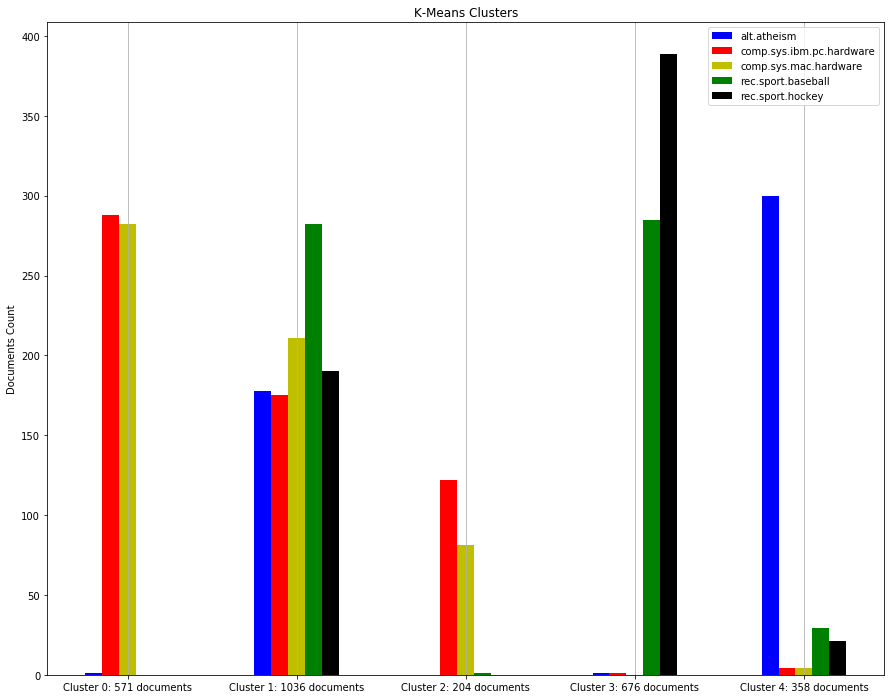

In [7]:
#(a) # Your Code goes here:
fig = plt.figure()
ax = fig.add_subplot(111)

pylab.rcParams['figure.figsize'] = (15, 12)

classes = cats

x = np.arange(len(classes))
x=x*2


labels = kmeans.labels_

# 'alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
#         'rec.sport.baseball', 'rec.sport.hockey'
# y = np.array(y)
ax = plt.subplot(111)
i = -0.4
colors = ['b','r','y','g','k']
c_i = 0

for c in cats:
    indices = [i for i, x in enumerate(y) if x == c] #indices for all documents belonging to specific class
    counts = labels[indices] 
    counts = collections.Counter(counts) #number of documents from specific class belonging to each cluster
    heights = np.zeros(5)
    for cluster in counts:
        heights[cluster] = counts[cluster]
    ax.bar(x+i, heights,width=0.2,color=colors[c_i],align='center')
    i+=0.2
    c_i+=1


values = collections.Counter(kmeans.labels_)
counts = np.zeros(5)
classes = []

for i in values:
    counts[i] = values[i]


i=0    
for a in counts:
    c = "Cluster " + str(i) + ": " + str(int(a)) + " documents"
    classes.append(c)
    i+=1

ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylabel('Documents Count')
plt.title('K-Means Clusters')
ax.legend(cats)
# ax.set_xticks(x+.5)
# x+=1
ax.xaxis.grid(True, xdata=x+1)


(b) ***Your answer goes here:***
As we can see from the distribution, many of the distinct class labels were partitioned into the same cluster, and some classes with the same label were partitioned into separate clusters. For some clusters, datapoints with similar class labels are found with a similar frequency, especially with the 'comp.sys.ibm.pc.hardware' and 'comp.sys.mac.hardware' which are similar topics and thereby likely have similar attributes. These similar classes caused elements belonging to different classes to be partitioned into the same clusters. Furthermore, some of the classes were split between clusters, indicating that our clustering accuracy may be hurt by the high dimensionality of the data, hence creating faulty clusters and further reducing our ARI score. 

### ========== Question 2.4 --- (LEVEL 11) --- [11 marks] ==========

Another way to quantify the quality of the fit is to use the Aggregate Intra-Cluster Distance (this is known as the `inertia` within SKLearn).

&nbsp;&nbsp;**(a)** [Text] Again by referring to the [sklearn documentation](http://scikit-learn.org/0.19/modules/clustering.html), describe what this measure reports. Indicate why it may be less straightforward at judging the quality of the clustering than the ARI. (2 to 3 sentences). <br>
&nbsp;&nbsp;**(b)** [Code] Report the Inertia of the fitted model as well as the mean distance between each data-point and the global mean. Compute also a distance matrix such that the entry with index (i,j) shows the distance between centre i and j.<br>
&nbsp;&nbsp;**(c)** [Text] Using the above values, comment on what the Inertia score tells us about the quality of the fit, as well as anything else you can say about the clusters. (2 to 3 sentences)

(a) ***Your answer goes here:***

In [11]:
# (b) # Your Code goes here:

(c) ***Your answer goes here:***

### ========== Question 2.5 --- [16 marks] ==========

We will now investigate using [PCA](http://scikit-learn.org/0.19/modules/generated/sklearn.decomposition.PCA.html) dimensionality reduction to try and improve the quality of the fit.

&nbsp;&nbsp;**(a)** [Text] Give one reason why PCA **might** be preferrable in certain cases in reducing dimensionality over just picking a subset of the features.<br>
&nbsp;&nbsp;**(b)** [Code] Pick 10 values in the range [1, ... 1000] inclusive, representing feature-space dimensionality `n`. Use a log-scale to span this range efficiently. For each of these values, reduce the dimensionality of `X` to the respective size (i.e. PCA with `n` components), and then fit a 5-centre KMeans classifier, storing the `adjusted_rand_score` for each dimensionality. *N.B: Set the `random_state=1000` for both PCA and K-Means objects to ensure reproducability.*<br>
&nbsp;&nbsp;**(c)** [Code] Plot the the `adjusted_rand_score` against the number of principal components. **Scale** the axes appropriately to visualise the results, and label the plot.<br>
&nbsp;&nbsp;**(d)** [Text] Comment on the effect dimensionality reduction had on the K-Means clustering and what could give rise to this (2 - 3 sentences).<br>
&nbsp;&nbsp;**(e)** [Code] Fit a 5-cluster K-Means object to the data with the dimensionality that produced the best ARI. In a similar manner to [Question 2.3](#question_2_3), plot a bar-chart of the number of data-points from each class assigned to each cluster. *N.B: Remember to set `random_state=1000` for both PCA and K-Means objects, and label all your diagrams*.<br>
&nbsp;&nbsp;**(f)** [Text] Compare the clustering distribution in **(e)** and in [Question 2.3 **(a)**](#question_2_3). *Hint: comment briefly (1 to 2 sentences) on the distribution of classes*.

(a) ***Your answer goes here:***
In feature selection, the algorithm would simply pick features that would achieve the greatest classification score without combining attributes. PCA on the other hand transforms the original feature dimensions into a lower dimension by combining features while preserving as much variance in the data as possible. In this case, the combination of features into a principle component has stronger explanatory power in classification than any individual feature. Therefore, PCA is a better choice for reducing the dimensionality. 

In [8]:
#(b) # Your Code goes here:
# Pick 10 values in the range [1, ... 1000] inclusive, representing feature-space dimensionality n. 
# Use a log-scale to span this range efficiently. For each of these values, reduce the dimensionality of X 
# to the respective size (i.e. PCA with n components), and then fit a 5-centre KMeans classifier, 
# storing the adjusted_rand_score for each dimensionality. 
# N.B: Set the random_state=1000 for both PCA and K-Means objects to ensure reproducability.

# dimensionality = np.logspace(1,3,100)
# dimensionality = dimensionality.astype(int)
# print(dimensionality)
dimensionality = [1,5,10,50,100,200,300,400,500,800,1000]
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X)
# Apply normalization on the set
X_scale = scaler.transform(X)
ARI = list()

for n in dimensionality:
    pca = PCA(n_components=n, random_state=1000)
    pca.fit(X_scale)
    X_new = pca.transform(X_scale) #transform features into new feature space
    
    kmeans = KMeans(n_clusters=5, random_state=1000).fit(X_new)
    ARI.append(adjusted_rand_score(y, kmeans.labels_))

ARI

[0.1632376560067453,
 0.32993289524111763,
 0.3437707968144808,
 0.3484449320566165,
 0.266541318476281,
 0.35070304761541404,
 0.30690430975052213,
 0.36819330563472313,
 0.2555203190129003,
 0.23361585745561197,
 0.3628646260800536]

[1, 5, 10, 50, 100, 200, 300, 400, 500, 800, 1000]
Highest ARI:  0.36819330563472313
Best Dimensionality:  400


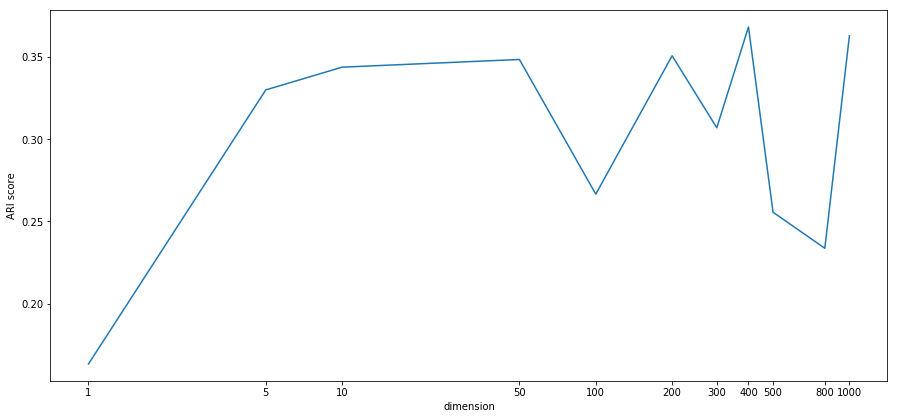

In [9]:
#(c) # Your Code goes here:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(211)

print(dimensionality)
dim_scaled = [math.log(n,10) for n in dimensionality] #log-scale the dimensionality to adjust for low values

plt.errorbar(dim_scaled, ARI, xlolims=True)

ax1.xaxis.set_ticks(dim_scaled)
ax1.xaxis.set_ticklabels(dimensionality)
plt.xlabel('dimension')
plt.ylabel('ARI score')

max_index = np.argmax(ARI)
print("Highest ARI: ", ARI[max_index])
best_n = dimensionality[max_index]
print("Best Dimensionality: ", best_n)

(d) ***Your answer goes here:***
Dimensionality reduction had a positive effect on the ARI score of the K-means clustering, meaning it helped improved the algorithm's ability to properly classify element pairs of the same or different class. Due to the high dimensionality of our dataset, it was difficult for our algorithm to discover differences between data points especially with meaningless dimensions. After transforming our dataset into a new dimension using PCA, we see a more distinct variability across the new component vectors as well as strong independence between these vectors, allowing our K-means algorithm to effectively discriminate unique instances based on their new, meaningful dimensions. 

0.36819330563472313


Text(0.5,1,'K-Means clusters after PCA')

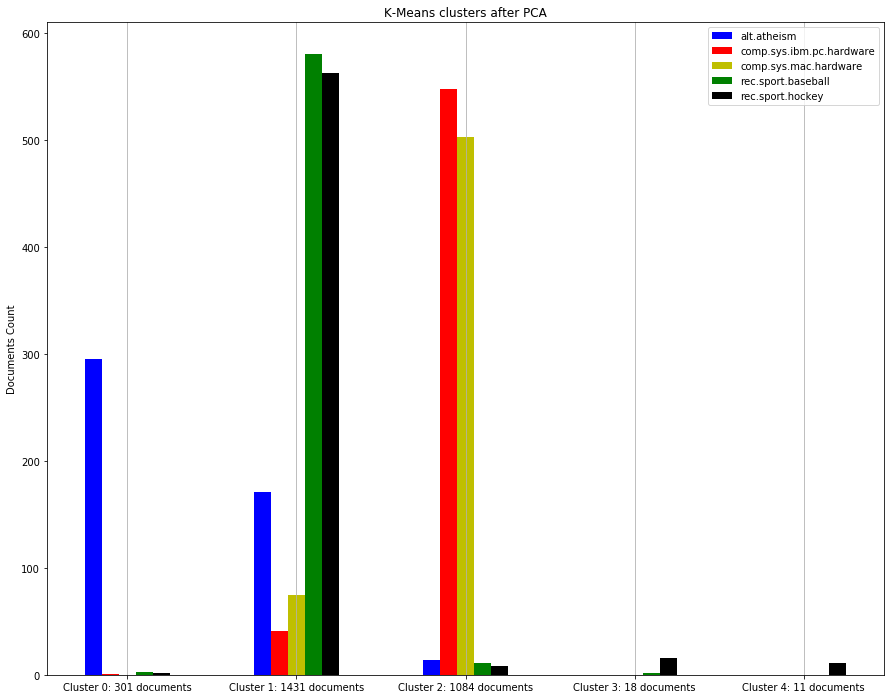

In [10]:
#(e) # Your Code goes here:
fig = plt.figure()
ax = fig.add_subplot(111)

pylab.rcParams['figure.figsize'] = (15, 12)

classes = cats

x = np.arange(len(classes))
x=x*2


pca = PCA(n_components=400, random_state=1000)
pca.fit(X_scale)
X_new = pca.transform(X_scale) #transform features into new feature space

kmeans = KMeans(n_clusters=5, random_state=1000).fit(X_new) #fit kmeans instance to X_new
labels = kmeans.labels_

# 'alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
#         'rec.sport.baseball', 'rec.sport.hockey'
# y = np.array(y)

i = -0.4
colors = ['b','r','y','g','k']
c_i = 0


for c in cats:
    indices = [i for i, x in enumerate(y) if x == c] #indices for all documents belonging to specific class
    counts = labels[indices] 
    counts = collections.Counter(counts) #number of documents from specific class belonging to each cluster
    heights = np.zeros(5)
    for cluster in counts:
        heights[cluster] = counts[cluster] #heights is the number of instances of the specific class within each cluster
    ax.bar(x+i, heights,width=0.2,color=colors[c_i], align='center')
    i+=0.2
    c_i+=1



values = collections.Counter(labels)
counts = np.zeros(5)
classes = []

for i in values:
    counts[i] = values[i]


i=0    
for a in counts:
    c = "Cluster " + str(i) + ": " + str(int(a)) + " documents"
    classes.append(c)
    i+=1

print(adjusted_rand_score(y, labels))
    
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylabel('Documents Count')
ax.legend(cats)
ax.xaxis.grid(True, xdata=x+1)
plt.title('K-Means clusters after PCA')

(f) ***Your answer goes here:***
After performing PCA, we see the majority of our data clustered into 3 groups, with instances containing related class labels grouped into the same cluster. Despite this, the advantage of this distribution over that in 2.3 is that here we see instances of the same class primarily being grouped into the same cluster, instead of being distributed across different clusters, which tells us that our model was able to understand similarities between instances in the same class after PCA.

### ========== Question 2.6 --- [16 marks] ==========

Another benefit of Dimensionality Reduction is that it allows us to visualise the data. That is, while we cannot visualise a 1000-feature space, we can pick the top two components and visualise those. We will do this by means of a [Voronoi Diagram](https://en.wikipedia.org/wiki/Voronoi_diagram), which we will use to analyse the cluster centres.

&nbsp;&nbsp;**(a)** [Text] By explaining what a Voronoi Diagram is, indicate why it is useful in visualising the extent (in space) of K-Means clusters?<br>
&nbsp;&nbsp;**(b)** [Code] Using the function `plot_voronoi` which we provided in the `utils` package, visualise the clusters in the two-dimensional PCA space (top two components). Mark each cluster centre, and visualise **some** (*Hint: sub-sample*) of the data points to give you an idea of where the true classes lie. Make sure that the key elements of the plot are clearly visible/discernible (you may need to tweak some parameters) and label clearly all necessary elements of the plot (color-coding, data points). *Tip: you may need to change y to a numeric value if using matplotlib rather than seaborn*.<br>
&nbsp;&nbsp;**(c)** [Text] What can you conclude from the plot as to the `classification-performance` of the K-Means classifier?

(a) ***Your answer goes here:***
A Voronoi Diagram partitions a plane of data into specific classes, each one centralized around a centroid. Data points are assigned to the closest class centroid. After all data points are assigned, the grouped data points make up a cell, where all data points in the cell belong to the same class cluster. The Voronoi diagram is useful for visualizing K-means clusters because it allows us to explicitly see the extent of the clusters(space they span) and how the true labels fall into these spaces. This gives us insight into how the model is assigning data points into clusters and possible areas for improvement.

ARI:  0.28318242070567623


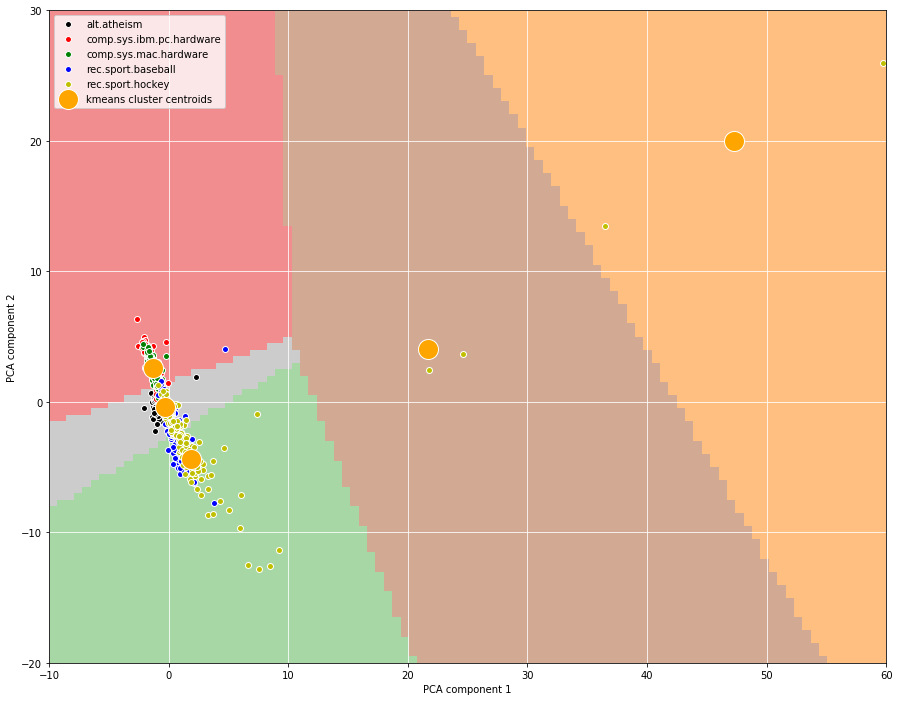

In [11]:
#(b) # Your Code goes here:
pca = PCA(n_components=2, random_state=1000)
pca.fit(X_scale)
X_new = pca.transform(X_scale) #transform features into new feature space

kmeans = KMeans(n_clusters=5, random_state=1000).fit(X_new) #fit kmeans instance to X_new
labels = kmeans.labels_

def get_indices(c, array):
    indices = [i for i, x in enumerate(array) if x == c] #indices for all documents belonging to specific class
    return indices

cluster0 = get_indices(0, labels)
c0_center = [np.mean(X_new[:,0][cluster0])], np.mean(X_new[:,1][cluster0])

cluster1 = get_indices(1, labels)
c1_center = [np.mean(X_new[:,0][cluster1])], np.mean(X_new[:,1][cluster1])

cluster2 = get_indices(2, labels)
c2_center = [np.mean(X_new[:,0][cluster2])], np.mean(X_new[:,1][cluster2])

cluster3 = get_indices(3, labels)
c3_center = [np.mean(X_new[:,0][cluster3])], np.mean(X_new[:,1][cluster3])

cluster4 = get_indices(4, labels)
c4_center = [np.mean(X_new[:,0][cluster4])], np.mean(X_new[:,1][cluster4])

fig = plt.figure()
range_ = [-10, 60, -20, 30]

plot_voronoi(kmeans, range_)

marker = "o"
colors = ['k', 'r', 'g', 'b', 'y']
for cat,color in zip(cats,colors):
    true_indices = get_indices(cat, y)
    sub_sample_indices = true_indices[1::4] #capture every 4th class element
    size = len(sub_sample_indices)
    class_ = [X_new[:,0][sub_sample_indices], X_new[:,1][sub_sample_indices]]
    plt.plot(class_[0][0:size], class_[1][0:size], marker, markersize=6, markerfacecolor=color, markeredgecolor='white', label="marker='{0}'".format(marker))

plt.plot(c0_center[0], c0_center[1], marker, markersize=20, markerfacecolor='orange', markeredgecolor='white')
plt.plot(c1_center[0], c1_center[1], marker, markersize=20, markerfacecolor='orange', markeredgecolor='white')
plt.plot(c2_center[0], c2_center[1], marker, markersize=20, markerfacecolor='orange', markeredgecolor='white')
plt.plot(c3_center[0], c3_center[1], marker, markersize=20, markerfacecolor='orange', markeredgecolor='white')
plt.plot(c4_center[0], c4_center[1], marker, markersize=20, markerfacecolor='orange', markeredgecolor='white')

plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.grid(True, color='white')
legend_labels = cats.copy()
legend_labels.append(labels)
L = plt.legend(legend_labels)
L.get_texts()[5].set_text('kmeans cluster centroids')
print("ARI: ", adjusted_rand_score(y, labels))

(c) ***Your answer goes here:***
What can you conclude from the plot as to the classification-performance of the K-Means classifier?

The K-means classifier is heavily influenced by similar class labels. Due to the high dimensionality of the original dataset, it was difficult for the classifier to differentiate between instances belonging to similar classes even after PCA, especially since so many of the original dimensions lacked meaning. The above plot shows just how similar the the respective classes are, with nearly all the datapoints between 'rec.sport.baseball', 'rec.sport.hockey', and 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware' overlapping. Due to this fact, as well as the presence of outliers in the data, the classifier is unable to create distinct clusters for the 5 true classes. Overall, the performance of the K-Means classifier is plagued by the curse of dimensionality. Because the concept of distance between instances becomes less precise as the dimensionality of a problem grows, the distance between two points in a high dimensional dataset becomes insignificant, even if these points are represented by different classes. Furthermore, with so many dimensions, it is very difficult to represent the entirety of the dimensionality with just two principal components, hence the voronoi plot struggles to accurately distinguish between classes. Despite this, we see successful clustering of unrelated classes, with almost complete separation between them. A possible way to improve the accuracy of this K-Means classifier is to add more instances to the dataset, or reduce the dimensionality of the instances to only include the dimensions that have relevant influence on the class labels. 